In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2020-11-30 14:52:18--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.80.48, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2020-11-30 14:52:19 (35.0 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

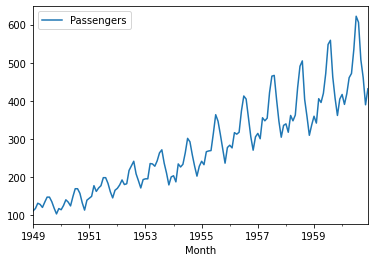

In [4]:
df.plot();

In [5]:
adfuller(df['Passengers'])

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [6]:
# first 2 return values are test-statistic and p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [48]:
def adf(x,verbose=True):
  res = adfuller(x)
  if verbose:
    print("Test-Statistic:", res[0])
    print("P-Value:", res[1])
  if res[1] < 0.05:
    if verbose:
      print("Stationary")
    return "Stationary"
  else:
    if verbose:
      print("Non-Stationary")
    return "Non-Stationary"

In [8]:
adf(df['Passengers'])

Test-Statistic: 0.815368879206047
P-Value: 0.991880243437641
Non-Stationary


In [9]:
adf(np.random.randn(100))

Test-Statistic: -10.851742928387495
P-Value: 1.5226428872294073e-19
Stationary


In [10]:
adf(np.random.gamma(1, 1, 100))

Test-Statistic: -9.148570130814408
P-Value: 2.7254618136989313e-15
Stationary


In [11]:
df['LogPassengers'] = np.log(df['Passengers'])

In [12]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069605
P-Value: 0.42236677477039125
Non-Stationary


In [13]:
df['Diff'] = df['Passengers'].diff()

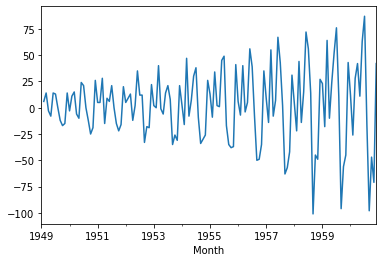

In [14]:
df['Diff'].plot()

In [15]:
adf(df['Diff'].dropna())

Test-Statistic: -2.8292668241700056
P-Value: 0.054213290283824704
Non-Stationary


In [16]:
df['DiffLog'] = df['LogPassengers'].diff()

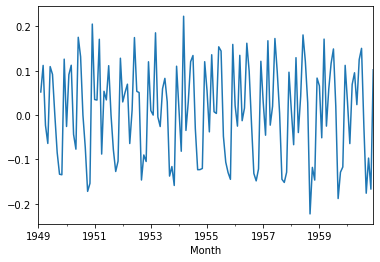

In [17]:
df['DiffLog'].plot()

In [22]:
adf(df['DiffLog'].dropna())

Test-Statistic: -2.7171305983881284
P-Value: 0.0711205481508595
Non-Stationary


In [27]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2020-11-30 14:55:15--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M   443KB/s    in 60s     

2020-11-30 14:56:17 (412 KB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [28]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)


In [29]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [23]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/projects/timeseries')
!l

Mounted at /content/gdrive
/bin/bash: l: command not found


In [31]:
stocks=pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [32]:
stocks.head()

,TSLA,INTC,AMD,AAPL,MSFT,SPY,GOOG,FB,IBM
2014-03-27,41.464,21.018478,3.91,17.226390,34.295100,162.358036,558.46,60.97,145.173820
2014-03-28,42.474,21.275915,3.88,17.207159,35.114139,163.158480,559.99,60.01,145.647970
2014-03-31,41.690,21.437021,4.01,17.203313,35.715349,164.495484,556.97,60.24,147.208074
2014-04-01,43.394,21.583179,4.07,17.360685,36.090016,165.586198,567.16,62.62,148.745236
2014-04-02,46.058,21.500135,4.06,17.389532,36.029024,166.140351,567.00,62.72,148.018716


In [33]:
goog = stocks['GOOG']

In [35]:
goog['LogPrice'] = np.log(goog)

In [36]:
goog['LogRet'] = goog['LogPrice'].diff()

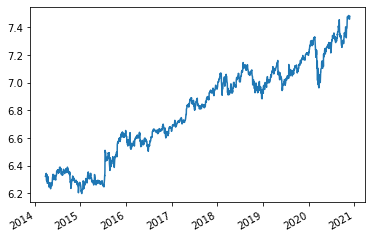

In [37]:
goog['LogPrice'].plot();

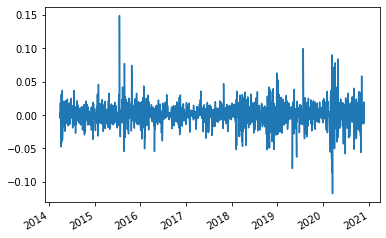

In [38]:
goog['LogRet'].plot();

In [39]:
adf(goog['LogPrice'])

Test-Statistic: -0.218397886298283
P-Value: 0.9362928115640364
Non-Stationary


In [40]:
adf(goog['LogRet'].dropna())

Test-Statistic: -14.274532712802555
P-Value: 1.3563727721465012e-26
Stationary


In [41]:
sbux = stocks['AMD']
sbux['LogPrice'] = np.log(sbux)
sbux['LogRet'] = sbux['LogPrice'].diff()

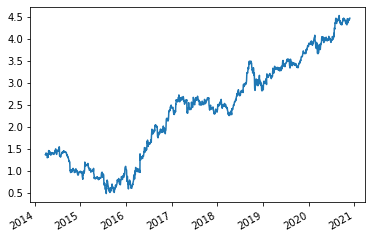

In [42]:
sbux['LogPrice'].plot();

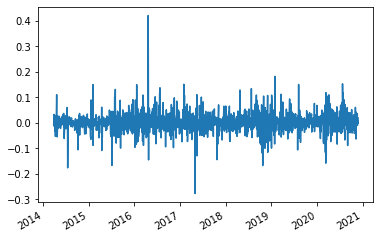

In [43]:
sbux['LogRet'].plot();

In [44]:
adf(sbux['LogPrice'])

Test-Statistic: 0.3533138992874625
P-Value: 0.9796625452618963
Non-Stationary


In [45]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -23.997675386541978
P-Value: 0.0
Stationary


In [52]:
def adf_noverbose(x):
  x=x.dropna()
  return adf(x,verbose=False)

In [58]:
stocks.apply(adf_noverbose,axis=0)

TSLA    Non-Stationary
INTC    Non-Stationary
AMD     Non-Stationary
AAPL    Non-Stationary
MSFT    Non-Stationary
SPY     Non-Stationary
GOOG    Non-Stationary
FB      Non-Stationary
IBM         Stationary
dtype: object

In [59]:
np.log(stocks).apply(adf_noverbose,axis=0)

TSLA    Non-Stationary
INTC    Non-Stationary
AMD     Non-Stationary
AAPL    Non-Stationary
MSFT    Non-Stationary
SPY     Non-Stationary
GOOG    Non-Stationary
FB      Non-Stationary
IBM         Stationary
dtype: object

In [62]:
np.log(stocks).diff().apply(adf_noverbose,axis=0)

TSLA    Stationary
INTC    Stationary
AMD     Stationary
AAPL    Stationary
MSFT    Stationary
SPY     Stationary
GOOG    Stationary
FB      Stationary
IBM     Stationary
dtype: object

In [65]:
 [c.max() for l,c in np.log(stocks).diff().items()]

[0.18144501798943757,
 0.1783244118102436,
 0.4206169131287666,
 0.11315745846657066,
 0.13292895317302378,
 0.08673100577521708,
 0.14887186294533095,
 0.14428595371948827,
 0.1070684580062844]